# Newton's Method

In [1]:
using Plots; pyplot()
using LaTeXStrings
using Printf

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [11]:
function newton(f, df, p0, n_max, rel_tol; verbose = true)
    
    converged = false;
    p = p0;
    p_old = p0;

    for i in 1:n_max

        p = p_old - f(p_old)/df(p_old);
        
        if verbose
            @printf(" %d: p = %.15g, f(p) = %g\n", i, p, f(p));
        end

        
        if (i>1)
            if abs(p-p_old)/abs(p)< rel_tol
                converged = true;
                break
            end
        end

        p_old = p;

    end
    
    if !converged
        @printf("ERROR: Did not converge after %d iterations\n", n_max);
    end

    return p
    
end

newton (generic function with 1 method)

In [20]:
function bisection(f, a, b, n_max, rel_tol; verbose = true)
    
    converged = false;
    p_old = 0;
    p = 0;
    for i in 1:n_max

        p = 0.5 * (a+b)
        
        if verbose
            @printf(" %d: a = %g, b = %g, p = %.15g, f(p) = %g\n", i, a, b, p, f(p));
        end

        if ( f(a) * f(p)<=0)
            b = p;
        else
            a = p
        end
        
        if (i>1)
            if abs(p-p_old)/abs(p)< rel_tol
                converged = true;
                break
            end
        end

        if(abs(f(p))==0)
            converged = true;
            break
        end
        p_old = p;

    end
    
    if !converged
        @printf("ERROR: Did not converge after %d iterations\n", n_max);
    end

    return p
    
end

bisection (generic function with 1 method)

## Example 
Compute $\sqrt{2}$ by solving $f(x) = 0$ with
$$
f(x) = x^2-2.
$$

In [18]:
f = x-> x^2 - 2;
df = x->2*x;
p0 = 1;
rel_tol = 1e-8;
n_max = 100;

p = newton(f, df, p0, n_max, rel_tol);

 1: p = 1.5, f(p) = 0.25
 2: p = 1.41666666666667, f(p) = 0.00694444
 3: p = 1.41421568627451, f(p) = 6.0073e-06
 4: p = 1.41421356237469, f(p) = 4.51061e-12
 5: p = 1.4142135623731, f(p) = 4.44089e-16


In [13]:
@printf("%.15g\n", sqrt(2))

1.4142135623731


### Comparison with Bisection

In [21]:
a = 1;
b = 2;
rel_tol = 1e-8;
n_max = 100;

p = bisection(f,a, b, n_max, rel_tol);

 1: a = 1, b = 2, p = 1.5, f(p) = 0.25
 2: a = 1, b = 1.5, p = 1.25, f(p) = -0.4375
 3: a = 1.25, b = 1.5, p = 1.375, f(p) = -0.109375
 4: a = 1.375, b = 1.5, p = 1.4375, f(p) = 0.0664062
 5: a = 1.375, b = 1.4375, p = 1.40625, f(p) = -0.0224609
 6: a = 1.40625, b = 1.4375, p = 1.421875, f(p) = 0.0217285
 7: a = 1.40625, b = 1.42188, p = 1.4140625, f(p) = -0.000427246
 8: a = 1.41406, b = 1.42188, p = 1.41796875, f(p) = 0.0106354
 9: a = 1.41406, b = 1.41797, p = 1.416015625, f(p) = 0.00510025
 10: a = 1.41406, b = 1.41602, p = 1.4150390625, f(p) = 0.00233555
 11: a = 1.41406, b = 1.41504, p = 1.41455078125, f(p) = 0.000953913
 12: a = 1.41406, b = 1.41455, p = 1.414306640625, f(p) = 0.000263274
 13: a = 1.41406, b = 1.41431, p = 1.4141845703125, f(p) = -8.20011e-05
 14: a = 1.41418, b = 1.41431, p = 1.41424560546875, f(p) = 9.06326e-05
 15: a = 1.41418, b = 1.41425, p = 1.41421508789062, f(p) = 4.31482e-06
 16: a = 1.41418, b = 1.41422, p = 1.41419982910156, f(p) = -3.88434e-05
 17: a

In [22]:
@printf("%.15g\n", sqrt(2))

1.4142135623731


### Visualization

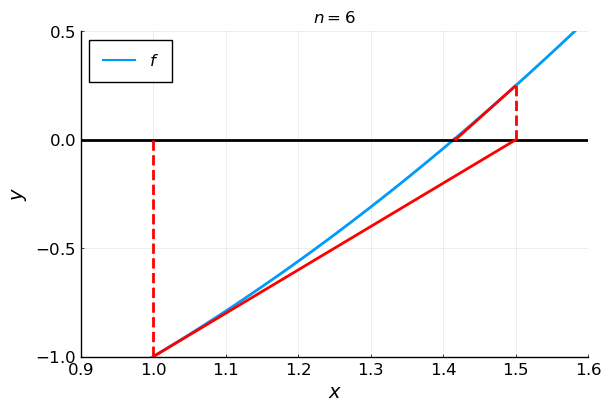

In [23]:
n_max = 5;
p_vals = zeros(n_max+1);
p0 = 1;

p = p0;
p_vals[1] = p;
for i in 1:n_max
    p = p - f(p)/df(p);
    p_vals[i+1] = p;

end

xx = LinRange(0,2,100);

ff = f.(xx);
plot(xx, ff, label=L"$f$", legend=:topleft)
plot!(xx, 0 *xx,label="", color=:black)

anim = @animate for i=1:n_max+1
    
    p = p_vals[i];
    
    plot!([p, p], [0, f(p)], label="", color=:red, ls=:dash)
    plot!([p, p- f(p)/df(p)],[f(p), 0],label="", color=:red)
    xlims!(0.9,1.6)
    ylims!(-1, 0.5)
    
    xlabel!(L"$x$");
    ylabel!(L"$y$")
    title!(latexstring(@sprintf("\$n = %d\$", i)))
end;



┌ Info: Saved animation to 
│   fn = /Users/grs53/code/Math_300_2021/notebooks/tmp.gif
└ @ Plots /Users/grs53/.julia/packages/Plots/yfzIY/src/animation.jl:114


Plots.AnimatedGif("/Users/grs53/code/Math_300_2021/notebooks/tmp.gif")
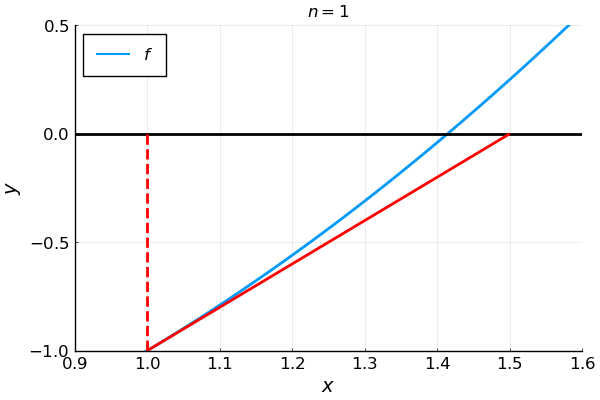

In [24]:
gif(anim,  fps = 1)

## Example
Find a root of
$$
f(x) = \cos(x) - x
$$

In [25]:
f = x-> cos(x) -x;
df = x->-sin(x) -1;
p0 = 0;
rel_tol = 1e-8;
n_max = 100;

p = newton(f, df, p0, n_max, rel_tol);

 1: p = 1, f(p) = -0.459698
 2: p = 0.750363867840244, f(p) = -0.0189231
 3: p = 0.739112890911362, f(p) = -4.64559e-05
 4: p = 0.739085133385284, f(p) = -2.84721e-10
 5: p = 0.739085133215161, f(p) = 0


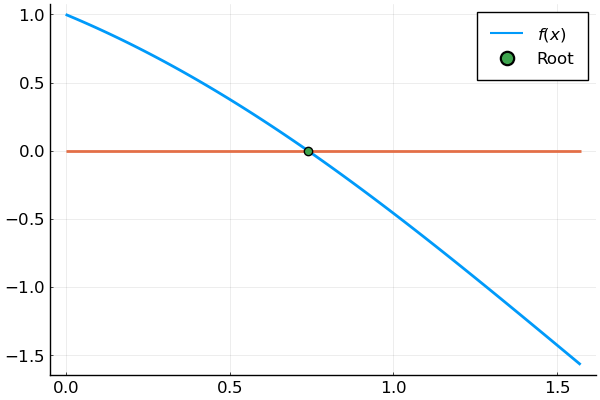

In [26]:
xx = LinRange(0,π/2,100);
plot(xx, f.(xx), label=L"$f(x)$")
plot!(xx, 0*xx, label="")
scatter!([p], [f(p)],label="Root")

In [27]:
using ForwardDiff

In [29]:
df_auto = x-> ForwardDiff.derivative(f,x)

#49 (generic function with 1 method)

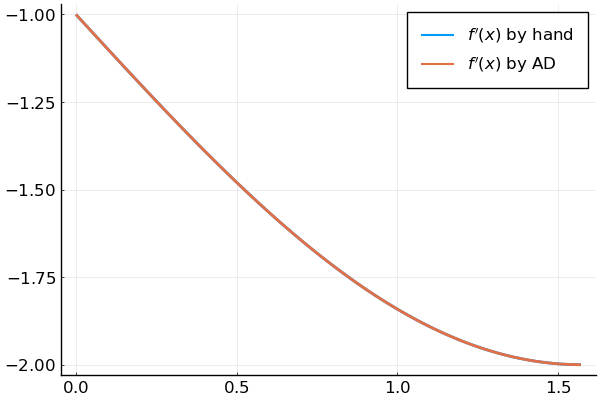

In [30]:
xx = LinRange(0,π/2,100);
plot(xx, df.(xx), label=L"$f'(x)$ by hand")
plot!(xx, df_auto.(xx), label=L"$f'(x)$ by AD")

